In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv('SeoulBikeData.csv',encoding='unicode_escape')

In [10]:
%timeit pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Date']= pd.to_datetime(df['Date'],dayfirst = True)

4.34 ms ± 58.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['Day of week'] = pd.DatetimeIndex(df['Date']).day_name()
#Select all the Functioning Day
df=df[df['Functioning Day'].isin(['Yes'])]

In [12]:
df1= df[['Rented Bike Count', 'Hour','Temperature(?C)']]
df1.head(10)

,Rented Bike Count,Hour,Temperature(?C)
0,254,0,-5.2
1,204,1,-5.5
2,173,2,-6.0
3,107,3,-6.2
4,78,4,-6.0
5,100,5,-6.4
6,181,6,-6.6
7,460,7,-7.4
8,930,8,-7.6
9,490,9,-6.5


In [13]:
def rating_function(x):
    if x >= 350:
        return 1
    else:
        return 0
df1["Rented Bike Count"] = df1["Rented Bike Count"].apply(rating_function)
# Transfer Count number into classification variable
df1.head(10)

<ipython-input-13-3c2c46faefca>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Rented Bike Count"] = df1["Rented Bike Count"].apply(rating_function)


,Rented Bike Count,Hour,Temperature(?C)
0,0,0,-5.2
1,0,1,-5.5
2,0,2,-6.0
3,0,3,-6.2
4,0,4,-6.0
5,0,5,-6.4
6,0,6,-6.6
7,1,7,-7.4
8,1,8,-7.6
9,1,9,-6.5


In [14]:
from tqdm import tqdm
class LogisticRegression:
    def __init__(self,learningRate,tolerance,maxIteration=50000):
        self.learningRate = learningRate
        self.tolerance = tolerance
        self.maxIteration = maxIteration
        
    def dataset_reader(self):
        train_df = df1[7298:7450]
        test_df = df1[7450:7600]
        train_df = np.array(train_df,dtype = np.float64)
        test_df = np.array(test_df,dtype = np.float64)
    
        
        X_train,y_train = train_df[:,1:],train_df[:,0]
        X_test,y_test = test_df[:,1:],test_df[:,0]
        
        return X_train,X_test,y_train,y_test
    
    def add_x0(self,X):
        
        return np.column_stack([np.ones(X.shape[0])])
    
    def sigmoid(self,z):
        
        sig = 1/(1 + np .exp(-z))
        
        return sig
    
    def cost_function(self,X,y):
        
        sig = self.sigmoid(X.dot(self.w))
        pred= y *np.log(sig) + (1 - y)* np.log(1 - sig)
        cost = pred.sum()
        
        # or:
        pred_ = np.log(np.ones(X.shape[0])+ np.exp(sig)) - X.dot(self.w).dot(y)
        cost = pred_.sum()
        
        return cost
    
    def gradient(self,X,y):
        
        sig = self.sigmoid(X.dot(self.w))
        grad = (sig - y).dot(X)
        
        return grad
    
    def gradient_descent(self,X,y):
        
        cost_sequence = []
        last_cost = float('inf')
        tolerance_counter= 0
        
        for i in tqdm (range(self.maxIteration)):
            self.w = self.w - self.learningRate*self.gradient(X,y)
            current_cost = self.cost_function(X,y)
            diff = last_cost - current_cost
            last_cost = current_cost
            cost_sequence.append(current_cost)
            
            if diff < self.tolerance:
                tolerance_counter += 1
                print('The model stopped - no further improvement')
            if tolerance_counter == 10:
                break
        
        self.plot_cost(cost_sequence)
        return
    
    def plot_cost(self,cost_sequence):
        s = np.array(cost_sequence)
        t = np.arange(s.size)
        
        fig,ax = plt.subplots()
        ax.plot(t,s)
        
        ax.set(xlabel='iteration', ylabel='cost',title = 'cost trend')
        ax.grid()
        plt.show()
        
    def predict(self,X):
        
        sig = self.sigmoid(X.dot(self.w))
        return np.around(sig)
    
    def evaluate(self,y,y_hat):
        y = (y==1)
        y_hat = (y_hat == 1)
        
        accuracy = (y == y_hat).sum() / y.size
        precision = (y & y_hat).sum()/y_hat.sum()
        recall = (y & y_hat).sum() / y.sum()
        
        return accuracy, recall, precision
    
    def run_model(self):
        self.X_train,self.X_test,self.y_train,self.y_test = self.dataset_reader()
        self.w = np.ones(self.X_train.shape[1],dtype=np.float64) * 0
        self.gradient_descent(self.X_train,self.y_train)
        
        print(self.w)
        
        y_hat = self.predict(self.X_train)
        accuracy, recall , precision = self.evaluate(self.y_train,y_hat)
        
        print('Accuracy:', accuracy)
        print('Recall:', recall)
        print('Precision:',precision)
 ####################################################
    def plot(self):
        plt.figure(figsize=(12, 8))
        ax = plt.axes(projection='3d')

        # Data for three-dimensional scattered points
        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                     self.sigmoid(self.X_train.dot(self.w)), 
                     c = self.y_train[:], cmap='viridis', s=100);

        ax.set_xlim3d(-1, 25)
        ax.set_ylim3d(10, 36)
        plt.xlabel('Hour', fontsize=15)
        plt.ylabel('Temperatyre', fontsize=15, )
        ax.set_zlabel('Probability  $P(Y = 1|x_1, x_2)$', fontsize=15, rotation = 0)

    
    def scatterPlt(self):
        # evenly sampled points
        x_min, x_max = -1, 25
        y_min, y_max = 10, 26

        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)

        f, ax = plt.subplots(figsize=(8,8))


        ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)


        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        plt.xlabel('Hour')
        plt.ylabel('Temperature')
        plt.title('LOGISTIC(Test set)')

    def plot3D(self):
        # evenly sampled points
        x_min, x_max = -1, 25
        y_min, y_max = 10, 26
        
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 250),
                             np.linspace(y_min, y_max, 250))
        
        grid = np.c_[xx.ravel(), yy.ravel()]
        probs = grid.dot(self.w).reshape(xx.shape)
        fig = plt.figure(figsize=(14,12))
        ax = plt.axes(projection='3d')
        ax.contour3D(xx, yy, probs, 50, cmap='binary')

        ax.scatter3D(self.X_train[:, 0], self.X_train[:, 1], 
                   c=self.y_train[:], s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)

        ax.set_xlabel('Hour')
        ax.set_ylabel('Temperature')
        ax.set_zlabel('probs')
        ax.set_title('3D contour')
        plt.show()

In [15]:
d = LogisticRegression(tolerance=0,learningRate=0.1e-6,maxIteration=100000)

100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:09<00:00, 10799.60it/s]


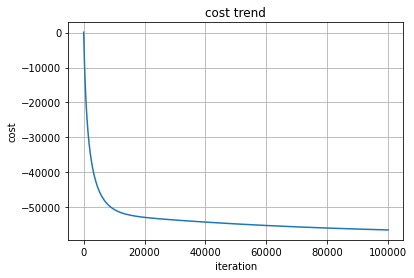

[0.18498481 0.03840193]
Accuracy: 0.8552631578947368
Recall: 1.0
Precision: 0.8552631578947368


In [16]:
d.run_model()

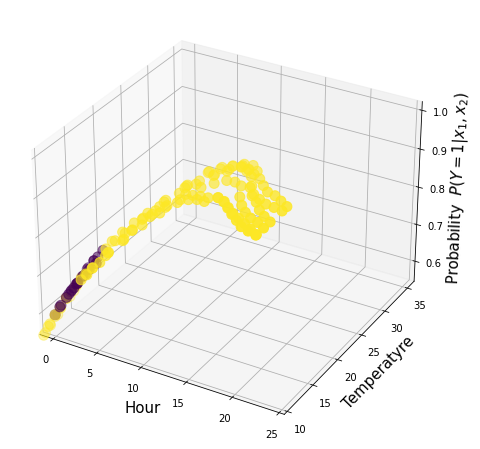

In [14]:
d.plot()

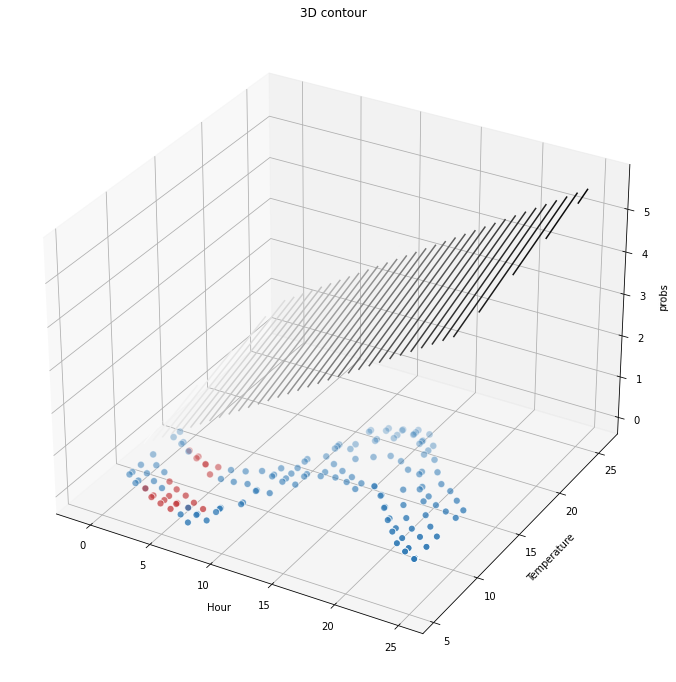

In [16]:
d.plot3D()

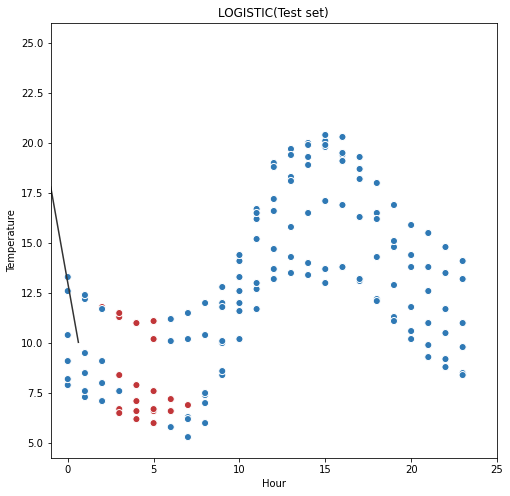

In [17]:
d.scatterPlt()